<a href="https://colab.research.google.com/github/ayten21/Natural-Language-Processing-with-Tensorflow/blob/main/NLP_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
def unzip_data(filename):
  
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2022-04-18 07:22:36--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-04-18 07:22:36 (102 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data('nlp_getting_started.zip')

In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df.value_counts()

id     keyword   location                        text                                                                                                                                 target
48     ablaze    Birmingham                      @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C                                                                              1         1
7166   mudslide  Chiswick, London                2 great new recipes; mudslide cake and so sorry stew! #GBBO                                                                          0         1
7178   mudslide  Edinburgh                       @hazelannmac ooh now I feel guilty about wishing hatman out. I bet the mudslide was delicious!                                       0         1
7176   mudslide  London                          First impressions: glad hat man is leaving in lieu of more interesting ladies. Hope mudslide lady triumphs next week.                0         1
7174   mudslide  The Pumpkin Carria

In [ ]:
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.target.value_counts() 

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
print(f'Total training samples: {len(train_df)}')
print(f'Total testing samples: {len(test_df)}')
print(f'Total samples: {len(train_df) + len(test_df)}')

Total training samples: 7613
Total testing samples: 3263
Total samples: 10876


In [ ]:
import random
random_index = random.randint(0, len(train_df) - 5) #create random index not higher than total number of samples
for row in train_df_shuffled[['text', 'target']][random_index:random_index + 5].itertuples():
  _, text, target = row
  print(f'Target: {target}', '(real disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target: 1 (real disaster)
Text:
The Catastrophic Effects of Hiroshima and Nagasaki Atomic Bombings Still Being Felt Today http://t.co/WC8AqXeDF7

---

Target: 1 (real disaster)
Text:
#NYC #News Legionnaires death toll rises to 8 in New York City: All eight fatalities were of older adults with... http://t.co/IQJ1Z3jXx8

---

Target: 1 (real disaster)
Text:
My heart goes out to all those effected by the wild fires in Cali????

---

Target: 0 (not real disaster)
Text:
@editaxohaze then let the bagging body's begin lol ???? I ain't cuffed yet so it shouldn't be that bad!!

---

Target: 0 (not real disaster)
Text:
Owner of Chicago-Area Gay Bar Admits to Arson Scheme http://t.co/MYhOHvrHiL #LGBT | https://t.co/TM5HTHFDO0

---



In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
import tensorflow as tf
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens = None,
                                                    standardize = 'lower_and_strip_punctuation',
                                                    split = 'whitespace',
                                                    ngrams = None,
                                                    output_mode = 'int',
                                                    output_sequence_length = None,
                                                    #pad_to_max_tokens = True - no need if you set max_tokens = None
                                                    )

In [ ]:
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [ ]:
max_vocab_length = 10000
max_length = 15
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens = max_vocab_length,
                                                    output_mode = 'int',
                                                    output_sequence_length = max_length)

In [ ]:
text_vectorizer.adapt(train_sentences) 

In [ ]:
sample = 'I am learning Tensorflow'
text_vectorizer([sample])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   8,  160, 2067,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\n\nVectorized version:')
text_vectorizer([random_sentence])

Original text:
love 106.1 The Twister @1061thetwister  and Maddie and Tae #OKTXDUO

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 110,    1,    2,  358, 6372,    7,    1,    7, 7831,    1,    0,
           0,    0,    0,    0]])>

In [ ]:
words_in_vocabulary = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocabulary[:5]
bottom_5_words = words_in_vocabulary[-5:]
print(f'Number of words in vocabulary: {len(words_in_vocabulary)}')
print(f'5 most common words: {top_5_words}')
print(f'5 least common words: {bottom_5_words}')
#Here 'UNK' stands for unknown words

Number of words in vocabulary: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [ ]:
tf.random.set_seed = 42
embedding = tf.keras.layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             embeddings_initializer = 'uniform',
                             input_length = max_length,
                             name = 'embedding_1')
embedding

In [ ]:
random_sentence = random.choice(train_sentences)
print(f'Original sentence: \n{random_sentence} \n\nEmbedded Version:')
sample_embedding = embedding(text_vectorizer([random_sentence]))
sample_embedding

Original sentence: 
As of 2010 there were 17 Beluga deaths reported at #SeaWorld their average age 15 1/2 years #OpSeaWorld http://t.co/MZk5UjlFCV 

Embedded Version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04974591,  0.04985526,  0.01903409, ..., -0.04953365,
          0.02679976, -0.04885263],
        [-0.00247016, -0.00653664, -0.01706905, ..., -0.04739468,
          0.04096135, -0.00396155],
        [-0.02838008,  0.02322668,  0.01523441, ..., -0.04362528,
          0.00762721, -0.00637697],
        ...,
        [ 0.00983439, -0.02857705,  0.00637827, ...,  0.03930274,
         -0.03665   ,  0.03651825],
        [ 0.04382731,  0.03478918,  0.00233271, ...,  0.04931912,
         -0.02322978,  0.00706884],
        [-0.00456748,  0.04333467,  0.01820124, ..., -0.01453147,
         -0.04908552,  0.03282645]]], dtype=float32)>

In [ ]:
sample_embedding[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04974591,  0.04985526,  0.01903409,  0.00122663,  0.0430705 ,
        0.01828804, -0.04616555, -0.0450827 ,  0.03416891, -0.03887621,
        0.00704019, -0.00450778, -0.00125214, -0.02395308,  0.03591342,
        0.02101691, -0.00512405, -0.01297808,  0.03066048,  0.01520688,
        0.00058226,  0.0189091 , -0.01544069, -0.04261572,  0.00322551,
        0.02005755, -0.00979403, -0.01299461,  0.02325359, -0.00629889,
        0.04533367,  0.0383972 , -0.01957103, -0.00218313, -0.01481619,
        0.02797473, -0.01644049,  0.00145297, -0.02592037,  0.02556327,
       -0.01722677,  0.02156743, -0.00768169,  0.03004083,  0.00890709,
        0.04458382,  0.03631054, -0.04266575, -0.03090286, -0.01226129,
        0.00942884,  0.02980347,  0.04163538,  0.02214861, -0.00758255,
        0.03355822, -0.03269349, -0.00739242, -0.04373106, -0.0112231 ,
       -0.0209062 ,  0.02934806,  0.02298037,  0.04746385, -0.04979656,
        0.012247

In [ ]:
import sklearn

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ('tfidf',sklearn.feature_extraction.text.TfidfVectorizer()), #converts words to numbers using tfidf
                    ('clf', MultinomialNB()) #model the text
])
model_0.fit(train_sentences, train_labels)

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(baseline_score)

In [ ]:
baseline_prediction = model_0.predict(val_sentences)
baseline_prediction[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def evaluate_results(y_true, y_pred):
  """Calculates model accuracy, precision, recall and f1 socre for a binary classification model"""
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
  model_results = { 'accuracy' : model_accuracy,
                    'precision' : model_precision,
                    'recall' : model_recall,
                    'f1' : model_f1}
  return model_results

In [ ]:
baseline_results = evaluate_results(y_true = val_labels,
                                    y_pred = baseline_prediction)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
import datetime
def create_tensorboard_callback(dir_name, model_name):
  """ Creates a Tensorboard Callback to store log files;
  Stores log files with the filepath:
  'dir_name/model_name/current_datetime/' """
  log_dir = dir_name + '/' + model_name + '/' + datetime.datetime.now().strftime(' %Y %m %d - %H %M %S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard( log_dir = log_dir )
  print(f'Saving Tensorboard log files to : {log_dir}')
  return tensorboard_callback

save_dir = 'model_logs'

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs) 
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x) 
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name = 'model_1_dense')

In [ ]:
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = save_dir,
                                                                       model_name = 'single_dense_model')])

Saving Tensorboard log files to : model_logs/single_dense_model/ 2022 04 18 - 07 29 49
Epoch 1/5
215/215 [==============================] - 5s 8ms/step - loss: 0.6125 - accuracy: 0.6929 - val_loss: 0.5391 - val_accuracy: 0.7467
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4411 - accuracy: 0.8178 - val_loss: 0.4685 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3465 - accuracy: 0.8613 - val_loss: 0.4571 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2843 - accuracy: 0.8899 - val_loss: 0.4647 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2372 - accuracy: 0.9140 - val_loss: 0.4825 - val_accuracy: 0.7835


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.7927


[0.4845350682735443, 0.7926509380340576]

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.00355017,  0.00610237, -0.0083307 , ...,  0.00897776,
         -0.01191014,  0.00801889],
        [-0.0159027 ,  0.05184828, -0.00897415, ..., -0.02600843,
         -0.00751427,  0.05825888],
        [-0.00415934,  0.03843591, -0.00164201, ..., -0.01860747,
         -0.03469337,  0.02359466],
        ...,
        [-0.00852033,  0.02221067,  0.04888653, ..., -0.03384333,
          0.01254081,  0.03097658],
        [-0.06645945,  0.00656213,  0.0261209 , ..., -0.05120628,
         -0.01146927,  0.04391573],
        [-0.07569759,  0.04398594,  0.01945279, ..., -0.07066439,
         -0.06792993,  0.0246107 ]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
model_1_prediction_prob = model_1.predict(val_sentences)
model_1_prediction_prob[:10]

array([[0.30349737],
       [0.7373908 ],
       [0.99758327],
       [0.09024391],
       [0.1142689 ],
       [0.93497646],
       [0.9085358 ],
       [0.9922741 ],
       [0.9579456 ],
       [0.23467398]], dtype=float32)

In [ ]:
model_1_prediction = tf.squeeze(tf.round(model_1_prediction_prob))
model_1_prediction[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_1_results = evaluate_results(y_true = val_labels,
                                   y_pred = model_1_prediction)
model_1_results

{'accuracy': 79.26509186351706,
 'f1': 0.7889824348879466,
 'precision': 0.8002882489930304,
 'recall': 0.7926509186351706}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

In [ ]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f'Baseline {key} : {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key] - value:.2f}')
compare_baseline_to_new_results(baseline_results = baseline_results,
                                new_model_results = model_1_results)

Baseline accuracy : 79.27, New accuracy: 79.27, Difference: 0.00
Baseline precision : 0.81, New precision: 0.80, Difference: -0.01
Baseline recall : 0.79, New recall: 0.79, Difference: 0.00
Baseline f1 : 0.79, New f1: 0.79, Difference: 0.00


In [ ]:
tf.random.set_seed = 42
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer = 'uniform',
                                     input_length = max_length,
                                     name = 'embedding_2')
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')

(None, 15, 128)
(None, 64)


In [ ]:
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       'LSTM')])

Saving Tensorboard log files to : model_logs/LSTM/ 2022 04 15 - 09 32 22
Epoch 1/5
215/215 [==============================] - 8s 13ms/step - loss: 0.5144 - accuracy: 0.7427 - val_loss: 0.4483 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3154 - accuracy: 0.8742 - val_loss: 0.4910 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2184 - accuracy: 0.9162 - val_loss: 0.6231 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1481 - accuracy: 0.9460 - val_loss: 0.7400 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1112 - accuracy: 0.9583 - val_loss: 1.1257 - val_accuracy: 0.7480


In [ ]:
model_2_prediction_probs = model_2.predict(val_sentences)
model_2_prediction_probs.shape, model_2_prediction_probs[:10]

((762, 1), array([[0.3734417 ],
        [0.691919  ],
        [0.9996555 ],
        [0.00476108],
        [0.00131048],
        [0.99981326],
        [0.9936474 ],
        [0.9998988 ],
        [0.99975175],
        [0.3023579 ]], dtype=float32))

In [ ]:
model_2_predictions = tf.squeeze(tf.round(model_2_prediction_probs))
model_2_predictions[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_2_results = evaluate_results(y_true = val_labels,
                                   y_pred = model_2_predictions)
model_2_results

{'accuracy': 74.80314960629921,
 'f1': 0.7470809106608154,
 'precision': 0.747632002620677,
 'recall': 0.7480314960629921}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy : 79.27, New accuracy: 74.80, Difference: -4.46
Baseline precision : 0.81, New precision: 0.75, Difference: -0.06
Baseline recall : 0.79, New recall: 0.75, Difference: -0.04
Baseline f1 : 0.79, New f1: 0.75, Difference: -0.04


In [ ]:
tf.random.set_seed = 42
model_3_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer = 'uniform',
                                     input_length = max_length,
                                     name = 'embedding_3')
inputs = layers.Input(shape = (1,),dtype = 'string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name = 'model_3_GRU')

In [ ]:
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       'GRU')]) 

Saving Tensorboard log files to : model_logs/GRU/ 2022 04 15 - 09 32 46
Epoch 1/5
215/215 [==============================] - 8s 20ms/step - loss: 0.5383 - accuracy: 0.7184 - val_loss: 0.4752 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3212 - accuracy: 0.8711 - val_loss: 0.4545 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2158 - accuracy: 0.9194 - val_loss: 0.5493 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1478 - accuracy: 0.9495 - val_loss: 0.6629 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1110 - accuracy: 0.9618 - val_loss: 0.6298 - val_accuracy: 0.7559


In [ ]:
model_3_prediction_probs = model_3.predict(val_sentences)
model_3_prediction_probs[:10]

array([[0.20905223],
       [0.9312947 ],
       [0.9979978 ],
       [0.12456661],
       [0.02757823],
       [0.99565035],
       [0.95375746],
       [0.99861896],
       [0.9990238 ],
       [0.11895738]], dtype=float32)

In [ ]:
model_3_prediction = tf.squeeze(tf.round(model_3_prediction_probs))
model_3_prediction[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_3_results = evaluate_results(y_true = val_labels,
                                   y_pred = model_3_prediction)
print(model_3_results)
print('-----------------------------------------------------------------')
compare_baseline_to_new_results(baseline_results, model_3_results)

{'accuracy': 75.59055118110236, 'precision': 0.7557293707913207, 'recall': 0.7559055118110236, 'f1': 0.7547819586377322}
-----------------------------------------------------------------
Baseline accuracy : 79.27, New accuracy: 75.59, Difference: -3.67
Baseline precision : 0.81, New precision: 0.76, Difference: -0.06
Baseline recall : 0.79, New recall: 0.76, Difference: -0.04
Baseline f1 : 0.79, New f1: 0.75, Difference: -0.03


In [ ]:
tf.random.set_seed = 42
model_4_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer = 'uniform',
                                     input_length = max_length,
                                     name = 'embedding_4')
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = 'model_4_Bidirectional')

In [ ]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
model_4.history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       'Bidirectional_LSTM')])

Saving Tensorboard log files to : model_logs/Bidirectional_LSTM/ 2022 04 15 - 09 33 12
Epoch 1/5
215/215 [==============================] - 18s 32ms/step - loss: 0.5167 - accuracy: 0.7383 - val_loss: 0.4483 - val_accuracy: 0.7913
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3136 - accuracy: 0.8730 - val_loss: 0.4742 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2058 - accuracy: 0.9194 - val_loss: 0.6340 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1360 - accuracy: 0.9499 - val_loss: 0.7675 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0901 - accuracy: 0.9663 - val_loss: 0.8241 - val_accuracy: 0.7559


In [ ]:
model_4_prediction_probs = model_4.predict(val_sentences)
print(model_4_prediction_probs[:10])
print('---------------------------------------------------------------------')
model_4_predictions = tf.squeeze(tf.round(model_4_prediction_probs))
print(model_4_predictions[:10])

[[0.13315202]
 [0.7337778 ]
 [0.9998411 ]
 [0.05756569]
 [0.00559621]
 [0.9949025 ]
 [0.58484   ]
 [0.9998343 ]
 [0.99989223]
 [0.16094635]]
---------------------------------------------------------------------
tf.Tensor([0. 1. 1. 0. 0. 1. 1. 1. 1. 0.], shape=(10,), dtype=float32)


In [ ]:
model_4_results = evaluate_results(val_labels, model_4_predictions)
print(model_4_results)

print('----------------------------------------------------------------------------------------------------------------------')

compare_baseline_to_new_results(baseline_results, model_4_results)

{'accuracy': 75.59055118110236, 'precision': 0.7567160722556739, 'recall': 0.7559055118110236, 'f1': 0.7539595513230887}
----------------------------------------------------------------------------------------------------------------------
Baseline accuracy : 79.27, New accuracy: 75.59, Difference: -3.67
Baseline precision : 0.81, New precision: 0.76, Difference: -0.05
Baseline recall : 0.79, New recall: 0.76, Difference: -0.04
Baseline f1 : 0.79, New f1: 0.75, Difference: -0.03


In [ ]:
embedding_test = embedding(text_vectorizer(['this is just a test sentence'])) 
conv_1d = layers.Conv1D(filters = 32, kernel_size = 5, activation = 'relu') 
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test[:1]

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01471026, -0.03275876, -0.04846057, ..., -0.03802869,
         -0.00566854, -0.01991508],
        [-0.06445937,  0.0411699 ,  0.01578606, ..., -0.01585162,
         -0.05065763,  0.02583723],
        [-0.07379431,  0.01251218,  0.01600976, ..., -0.08204096,
         -0.00502763,  0.08615569],
        ...,
        [ 0.00355017,  0.00610237, -0.0083307 , ...,  0.00897776,
         -0.01191014,  0.00801889],
        [ 0.00355017,  0.00610237, -0.0083307 , ...,  0.00897776,
         -0.01191014,  0.00801889],
        [ 0.00355017,  0.00610237, -0.0083307 , ...,  0.00897776,
         -0.01191014,  0.00801889]]], dtype=float32)>

In [ ]:
conv_1d_output[:1]

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.08478336, 0.        , 0.01582954, 0.        , 0.02234826,
         0.02258763, 0.06644505, 0.        , 0.        , 0.047056  ,
         0.        , 0.        , 0.01516415, 0.        , 0.        ,
         0.00568517, 0.        , 0.01199101, 0.04597762, 0.        ,
         0.04318584, 0.        , 0.        , 0.        , 0.0439651 ,
         0.        , 0.02545345, 0.03991915, 0.01322544, 0.        ,
         0.        , 0.1221763 ],
        [0.07240443, 0.03403469, 0.01766868, 0.        , 0.14519945,
         0.        , 0.        , 0.        , 0.        , 0.10396951,
         0.0227187 , 0.10088072, 0.15113929, 0.01352853, 0.        ,
         0.02689004, 0.        , 0.10729939, 0.        , 0.        ,
         0.16026609, 0.13491517, 0.        , 0.02988615, 0.        ,
         0.01998289, 0.        , 0.        , 0.01483121, 0.        ,
         0.0284738 , 0.03930894],
        [0.03225756, 0.04447598, 0.03377689, 0.    

In [ ]:
max_pool_output[:1]

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.08478336, 0.08209559, 0.03377689, 0.        , 0.14519945,
        0.04564892, 0.06644505, 0.        , 0.        , 0.10396951,
        0.10398889, 0.10088072, 0.15113929, 0.0170568 , 0.03069829,
        0.03944316, 0.09978025, 0.20438507, 0.09666882, 0.03239824,
        0.16026609, 0.13491517, 0.        , 0.1783989 , 0.0439651 ,
        0.01998289, 0.07788707, 0.16127634, 0.07979877, 0.06280878,
        0.14455712, 0.1221763 ]], dtype=float32)>

In [ ]:
tf.random.set_seed = 42
model_5_embedding = layers.Embedding( input_dim = max_vocab_length,
                                      output_dim = 128,
                                      embeddings_initializer = 'uniform',
                                      input_length = max_length,
                                      name = 'embedding_5')
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters = 32, kernel_size = 5, activation = 'relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_conv1d')

model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
model_5.history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir, 'Conv_1D')])

Saving Tensorboard log files to : model_logs/Conv_1D/ 2022 04 15 - 09 34 11
Epoch 1/5
215/215 [==============================] - 7s 16ms/step - loss: 0.5610 - accuracy: 0.7235 - val_loss: 0.4681 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3403 - accuracy: 0.8624 - val_loss: 0.4755 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2111 - accuracy: 0.9256 - val_loss: 0.5289 - val_accuracy: 0.7992
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1390 - accuracy: 0.9526 - val_loss: 0.6081 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1016 - accuracy: 0.9669 - val_loss: 0.6551 - val_accuracy: 0.7756


In [ ]:
model_5_prediction_probs = model_5.predict(val_sentences)
model_5_prediction_probs[:10]

array([[0.8055669 ],
       [0.97257847],
       [0.998747  ],
       [0.04753668],
       [0.02090436],
       [0.9980368 ],
       [0.9214263 ],
       [0.997809  ],
       [0.99838185],
       [0.1148239 ]], dtype=float32)

In [ ]:
model_5_predictions = tf.squeeze(tf.round(model_5_prediction_probs))
model_5_predictions[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_5_results = evaluate_results(y_true = val_labels,
                                   y_pred = model_5_predictions)
model_5_results

{'accuracy': 77.55905511811024,
 'f1': 0.7736182129212565,
 'precision': 0.7772070861555818,
 'recall': 0.7755905511811023}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy : 79.27, New accuracy: 77.56, Difference: -1.71
Baseline precision : 0.81, New precision: 0.78, Difference: -0.03
Baseline recall : 0.79, New recall: 0.78, Difference: -0.02
Baseline f1 : 0.79, New f1: 0.77, Difference: -0.01


In [ ]:
import pandas as pd
all_model_results = pd.DataFrame({'baseline' : baseline_results,
                                'simple_dense' : model_1_results,
                                'lstm' : model_2_results,
                                'gru' : model_3_results,
                                'bidirectional' : model_4_results,
                                'conv1d' : model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,79.265092,0.800288,0.792651,0.788982
lstm,74.803150,0.747632,0.748031,0.747081
gru,75.590551,0.755729,0.755906,0.754782
bidirectional,75.590551,0.756716,0.755906,0.753960
conv1d,77.559055,0.777207,0.775591,0.773618


In [ ]:
all_model_results['accuracy'] = all_model_results['accuracy']/100

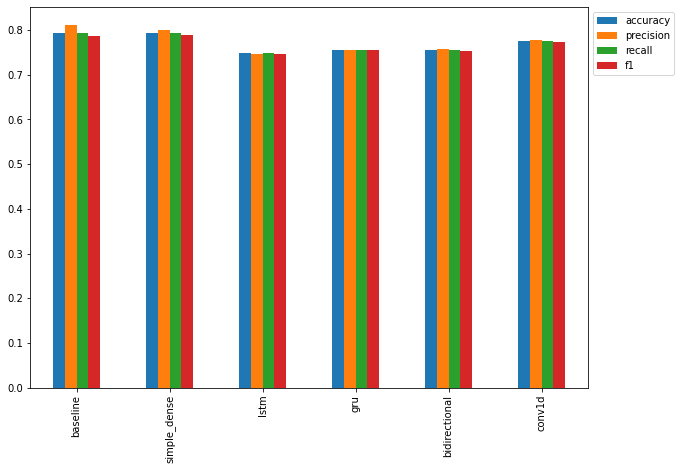

In [ ]:
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results.plot(kind = 'bar', figsize = (10,7)).legend(bbox_to_anchor = (1.0, 1.0));

In [ ]:
validation_df = pd.DataFrame( {'text': val_sentences,
                               'target': val_labels,
                               'prediction': model_1_prediction,
                               'prediction_probability' : tf.squeeze(model_1_prediction_prob)})

In [ ]:
validation_df.head()

,text,target,prediction,prediction_probability
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.303497
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.737391
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.997583
3,@camilacabello97 Internally and externally scr...,1,0.0,0.090244
4,Radiation emergency #preparedness starts with ...,1,0.0,0.114269


In [ ]:
most_wrong = validation_df[validation_df['target'] != validation_df['prediction']].sort_values('prediction_probability', ascending = False)
most_wrong[:10]

,text,target,prediction,prediction_probability
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.991849
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.983660
474,My phone looks like it was in a car ship airpl...,0,1.0,0.926416
682,A change in the State fire code prohibits gril...,0,1.0,0.878824
606,Maid charged with stealing Dh30000 from police...,0,1.0,0.855848
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.849176
181,Article by Michael Jackman at Metro Times Detr...,0,1.0,0.840580
712,WPRI 12 Eyewitness News Rhode Island set to mo...,0,1.0,0.816212
126,??One night and we're gonna come and crash the...,0,1.0,0.795302
643,another day another excellent @_dangerousbeans...,0,1.0,0.776078


In [ ]:
most_wrong.shape

(158, 4)

In [ ]:
for row in most_wrong[:5].itertuples(): 
  _, text, target, prediction, prediction_probability = row
  print(f'Target: {target}, Pred: {int(prediction)}, Prob: {prediction_probability}')
  print(f'Text:\n{text}\n')
  print('-----\n')

Target: 0, Pred: 1, Prob: 0.991849422454834
Text:
åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent Collapse Story: Correction: Tent Collapse story åÈ http://t.co/fDJUYvZMrv @wizkidayo

-----

Target: 0, Pred: 1, Prob: 0.9836603403091431
Text:
Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm   http://t.co/6GLDwx71DA

-----

Target: 0, Pred: 1, Prob: 0.9264159798622131
Text:
My phone looks like it was in a car ship airplane accident. Terrible

-----

Target: 0, Pred: 1, Prob: 0.8788236379623413
Text:
A change in the State fire code prohibits grills on decks at condos and apartment buildings.  Check with your... http://t.co/KE1ZS6NAml

-----

Target: 0, Pred: 1, Prob: 0.8558475971221924
Text:
Maid charged with stealing Dh30000 from police officer sponsor http://t.co/y35qtVDSOH | https://t.co/qhUJAjCTR5

-----



In [ ]:
for row in most_wrong[-5:].itertuples(): 
  _, text, target, prediction, prediction_probability = row
  print(f'Target: {target}, Pred: {int(prediction)}, Prob: {prediction_probability}')
  print(f'Text:\n{text}\n')
  print('-----\n')

Target: 1, Pred: 0, Prob: 0.012232013046741486
Text:
Rand Paul's Debate Strategy 'demolish Some other bad ideas out there or point out maybe that there are some em... http://t.co/qzdqRBr4Lh

-----

Target: 1, Pred: 0, Prob: 0.00851098820567131
Text:
Petition | Heartless owner that whipped horse until it collapsed is told he can KEEP his animal! Act Now! http://t.co/87eFCBIczM

-----

Target: 1, Pred: 0, Prob: 0.00783142726868391
Text:
Crazy Mom Threw Teen Daughter a NUDE Twister Sex Party According To Her Friend50 =&gt;http://t.co/Hy5Pbe12TM http://t.co/c1nJpLi5oR

-----

Target: 1, Pred: 0, Prob: 0.004253983031958342
Text:
Just came back from camping and returned with a new song which gets recorded tomorrow. Can't wait! #Desolation #TheConspiracyTheory #NewEP

-----

Target: 1, Pred: 0, Prob: 0.002418302232399583
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

-----



In [ ]:
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  prediction_probability = tf.squeeze(model_1.predict([test_sample]))
  prediction  = tf.round(prediction_probability)
  print(f'Pred: {int(prediction)}, Prob: {prediction_probability}')
  print(f'Text:\n{test_sample}\n')
  print('-------\n')

Pred: 0, Prob: 0.4893593490123749
Text:
10-Month-Old Baby Girl was Rescued by Coastguard after She Floated HALF A MILE Out to Sea! http://t.co/kJUzJC6iGD

-------

Pred: 0, Prob: 0.4007169306278229
Text:
Looks like a Mudslide!

#GBBO

-------

Pred: 0, Prob: 0.04236377775669098
Text:
???????? this the dead ass truth you pay for shit you not gone use  https://t.co/iW1sDopMvR

-------

Pred: 0, Prob: 0.35819143056869507
Text:
On 7/30/2015 Radiation council of Japanese government admitted the reform bill to raise the dose limit from 100... http://t.co/6bTeSV9CdM

-------

Pred: 1, Prob: 0.7373908162117004
Text:
FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/kA0syAhqVW via @usatoday

-------

Pred: 1, Prob: 0.630372166633606
Text:
@Aliyeskii @wquddin @tunkhin80 @MaungKyawNu @drkhubybe @nslwin @ibrahimdubashi @mdskar @zarnikyaw @kyawthu043 After cyclone

-------

Pred: 1, Prob: 0.9813376665115356
Text:
Suspect in latest US theatre attack had psycholo